In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical # convert a matrix to 1s and 0s
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [20]:
def load_and_preprocess_dataset(train_size, test_size):

    (train_dataset, test_dataset), dataset_info = tfds.load(
        'stanford_dogs',
        split=['train', 'test'],
        with_info=True,
        as_supervised=True
    )

    def preprocess(image, label):
        image = tf.image.resize(image, (28,28))
        image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
        return image, label

    train_dataset = train_dataset.map(preprocess)
    test_dataset = test_dataset.map(preprocess)

    train_dataset = train_dataset.take(train_size)
    test_dataset = test_dataset.take(test_size)

    X_train, y_train = [], []
    for image, label in tfds.as_numpy(train_dataset):
        X_train.append(image)
        y_train.append(label)

    X_test, y_test = [], []
    for image, label in tfds.as_numpy(test_dataset):
        X_test.append(image)
        y_test.append(label)

    # Reshape and convert lists to numpy arrays
    X_train = np.array(X_train).reshape(-1, 28 * 28 * 3)
    y_train = np.array(y_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 28 * 28 * 3)
    y_test = np.array(y_test).reshape(-1, 1)

    # Scaling
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    # One-hot encoding
    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    return X_train, X_test, y_train, y_test

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Adding dropout for regularization
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Assuming your images are RGB and resized to (28, 28, 3)
input_shape = (28, 28, 3)
num_classes = 120  # Adjust based on the number of classes in your dataset

cnn_model = create_cnn_model(input_shape, num_classes)

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 1152)             

In [22]:
X_train, X_test, y_train, y_test = load_and_preprocess_dataset(12000,8580)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (12000, 2352)
y_train: (12000, 120)
X_test: (8580, 2352)
y_test: (8580, 120)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming your input data has shape (None, 2352)
input_shape = (2352,)

def simple_model(init, activate):
    model = models.Sequential()
    model.add(layers.Dense(64, input_shape=input_shape, kernel_initializer=init, activation=activate))
    model.add(layers.Dense(32, kernel_initializer=init, activation=activate))
    model.add(layers.Dense(120, activation='softmax'))  # Assuming 120 classes for output

    return model

# Assuming your input data has shape (None, 2352)
X_train, X_test, y_train, y_test = load_and_preprocess_dataset(12000, 8580)

# Model initialization
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Create and compile the model
model_zeros = simple_model(init, activate)
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_zeros.summary()

# Fit the model to the data
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                150592    
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 120)               3960      
                                                                 
Total params: 156632 (611.84 KB)
Trainable params: 156632 (611.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 1s 113ms/step - loss: 4.7875 - accuracy: 0.0060 - val_loss: 4.7875 - val_accuracy: 0.0059
Epoch 2/10
4/4 [==============================] - 0s 37ms/step - loss: 4.7875 - accuracy: 0.0072 - val_loss: 4.7875 - val_accuracy: 0.0064

In [26]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 1s 120ms/step - loss: 4.8422 - accuracy: 0.0088 - val_loss: 4.8508 - val_accuracy: 0.0064
Epoch 2/10
4/4 [==============================] - 0s 36ms/step - loss: 4.8389 - accuracy: 0.0088 - val_loss: 4.8475 - val_accuracy: 0.0065
Epoch 3/10
4/4 [==============================] - 0s 41ms/step - loss: 4.8357 - accuracy: 0.0088 - val_loss: 4.8444 - val_accuracy: 0.0068
Epoch 4/10
4/4 [==============================] - 0s 53ms/step - loss: 4.8328 - accuracy: 0.0089 - val_loss: 4.8416 - val_accuracy: 0.0069
Epoch 5/10
4/4 [==============================] - 0s 40ms/step - loss: 4.8301 - accuracy: 0.0092 - val_loss: 4.8390 - val_accuracy: 0.0068
Epoch 6/10
4/4 [==============================] - 0s 49ms/step - loss: 4.8277 - accuracy: 0.0093 - val_loss: 4.8365 - val_accuracy: 0.0065
Epoch 7/10
4/4 [==============================] - 0s 44ms/step - loss: 4.8253 - accuracy: 0.0093 - val_loss: 4.8343 - val_accuracy: 0.0065
Epoch 8/10
4/4 [==========

In [27]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


4/4 [==============================] - 1s 100ms/step - loss: 4.9420 - accuracy: 0.0091 - val_loss: 4.9421 - val_accuracy: 0.0080
Epoch 2/10
4/4 [==============================] - 0s 42ms/step - loss: 4.9280 - accuracy: 0.0094 - val_loss: 4.9308 - val_accuracy: 0.0080
Epoch 3/10
4/4 [==============================] - 0s 43ms/step - loss: 4.9163 - accuracy: 0.0097 - val_loss: 4.9213 - val_accuracy: 0.0083
Epoch 4/10
4/4 [==============================] - 0s 41ms/step - loss: 4.9065 - accuracy: 0.0100 - val_loss: 4.9134 - val_accuracy: 0.0086
Epoch 5/10
4/4 [==============================] - 0s 40ms/step - loss: 4.8981 - accuracy: 0.0097 - val_loss: 4.9065 - val_accuracy: 0.0082
Epoch 6/10
4/4 [==============================] - 0s 38ms/step - loss: 4.8907 - accuracy: 0.0097 - val_loss: 4.9005 - val_accuracy: 0.0085
Epoch 7/10
4/4 [==============================] - 0s 41ms/step - loss: 4.8840 - accuracy: 0.0099 - val_loss: 4.8952 - val_accuracy: 0.0087
Epoch 8/10
4/4 [=====================

In [28]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


4/4 [==============================] - 2s 443ms/step - loss: 4.9849 - accuracy: 0.0084 - val_loss: 4.9986 - val_accuracy: 0.0092
Epoch 2/10
4/4 [==============================] - 0s 35ms/step - loss: 4.9619 - accuracy: 0.0087 - val_loss: 4.9809 - val_accuracy: 0.0089
Epoch 3/10
4/4 [==============================] - 0s 32ms/step - loss: 4.9446 - accuracy: 0.0087 - val_loss: 4.9671 - val_accuracy: 0.0092
Epoch 4/10
4/4 [==============================] - 0s 25ms/step - loss: 4.9309 - accuracy: 0.0088 - val_loss: 4.9560 - val_accuracy: 0.0093
Epoch 5/10
4/4 [==============================] - 0s 29ms/step - loss: 4.9196 - accuracy: 0.0093 - val_loss: 4.9466 - val_accuracy: 0.0097
Epoch 6/10
4/4 [==============================] - 0s 24ms/step - loss: 4.9098 - accuracy: 0.0095 - val_loss: 4.9386 - val_accuracy: 0.0104
Epoch 7/10
4/4 [==============================] - 0s 29ms/step - loss: 4.9012 - accuracy: 0.0100 - val_loss: 4.9317 - val_accuracy: 0.0108
Epoch 8/10
4/4 [=====================

Text(0, 0.5, 'Validation Accuracy')

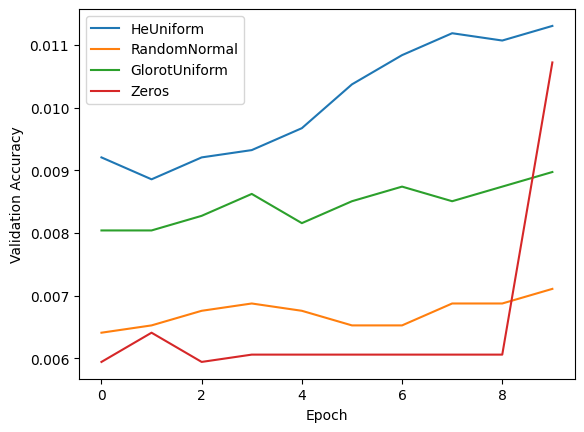

In [30]:
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [31]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [32]:
simple_model_bn().summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_39 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_40 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)              

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming your input data has shape (None, 2352)
input_shape = (2352,)

def simple_model_bn(init, activate):
    model = models.Sequential()
    model.add(layers.Dense(64, input_shape=input_shape, kernel_initializer=init, activation=activate))
    model.add(layers.BatchNormalization())  # Adding Batch Normalization
    model.add(layers.Dense(32, kernel_initializer=init, activation=activate))
    model.add(layers.BatchNormalization())  # Adding Batch Normalization
    model.add(layers.Dense(120, activation='softmax'))  # Assuming 120 classes for output

    return model

# Assuming your input data has shape (None, 2352)
X_train, X_test, y_train, y_test = load_and_preprocess_dataset(12000, 8580)

# Model initialization
init = tf.keras.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(0.01)

# Create and compile the model
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_bn.summary()

# Fit the model to the data
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 64)                150592    
                                                                 
 batch_normalization_8 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_49 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_9 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_50 (Dense)            (None, 120)               3960      
                                                                 
Total params: 157016 (613.34 KB)
Trainable params: 15

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 1s 118ms/step - loss: 4.9681 - accuracy: 0.0083 - val_loss: 4.8241 - val_accuracy: 0.0085
Epoch 2/10
4/4 [==============================] - 0s 39ms/step - loss: 4.9631 - accuracy: 0.0087 - val_loss: 4.8214 - val_accuracy: 0.0079
Epoch 3/10
4/4 [==============================] - 0s 48ms/step - loss: 4.9579 - accuracy: 0.0081 - val_loss: 4.8190 - val_accuracy: 0.0087
Epoch 4/10
4/4 [==============================] - 0s 36ms/step - loss: 4.9530 - accuracy: 0.0084 - val_loss: 4.8169 - val_accuracy: 0.0087
Epoch 5/10
4/4 [==============================] - 0s 33ms/step - loss: 4.9479 - accuracy: 0.0088 - val_loss: 4.8151 - val_accuracy: 0.0086
Epoch 6/10
4/4 [==============================] - 0s 34ms/step - loss: 4.9429 - accuracy: 0.0089 - val_loss: 4.8134 - val_accuracy: 0.0089
Epoch 7/10
4/4 [==============================] - 0s 41ms/step - loss: 4.9380 - accuracy: 0.0089 - val_loss: 4.8119 - val_accuracy: 0.0091
Epoch 8/10
4/4 [==========

In [35]:
init = tf.keras.initializers.he_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 1s 144ms/step - loss: 5.0051 - accuracy: 0.0079 - val_loss: 4.9877 - val_accuracy: 0.0087
Epoch 2/10
4/4 [==============================] - 0s 77ms/step - loss: 4.9951 - accuracy: 0.0084 - val_loss: 4.9783 - val_accuracy: 0.0091
Epoch 3/10
4/4 [==============================] - 0s 65ms/step - loss: 4.9857 - accuracy: 0.0088 - val_loss: 4.9696 - val_accuracy: 0.0089
Epoch 4/10
4/4 [==============================] - 0s 63ms/step - loss: 4.9761 - accuracy: 0.0091 - val_loss: 4.9617 - val_accuracy: 0.0092
Epoch 5/10
4/4 [==============================] - 0s 62ms/step - loss: 4.9668 - accuracy: 0.0090 - val_loss: 4.9546 - val_accuracy: 0.0091
Epoch 6/10
4/4 [==============================] - 0s 51ms/step - loss: 4.9583 - accuracy: 0.0093 - val_loss: 4.9481 - val_accuracy: 0.0089
Epoch 7/10
4/4 [==============================] - 0s 75ms/step - loss: 4.9504 - accuracy: 0.0098 - val_loss: 4.9424 - val_accuracy: 0.0085
Epoch 8/10
4/4 [==========

In [36]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model_bn_ad = simple_model_bn(init, activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ad.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 2s 170ms/step - loss: 4.9783 - accuracy: 0.0098 - val_loss: 4.7879 - val_accuracy: 0.0110
Epoch 2/10
4/4 [==============================] - 0s 55ms/step - loss: 4.9338 - accuracy: 0.0117 - val_loss: 4.7854 - val_accuracy: 0.0101
Epoch 3/10
4/4 [==============================] - 0s 49ms/step - loss: 4.8993 - accuracy: 0.0141 - val_loss: 4.7835 - val_accuracy: 0.0103
Epoch 4/10
4/4 [==============================] - 0s 47ms/step - loss: 4.8717 - accuracy: 0.0147 - val_loss: 4.7820 - val_accuracy: 0.0104
Epoch 5/10
4/4 [==============================] - 0s 46ms/step - loss: 4.8486 - accuracy: 0.0156 - val_loss: 4.7807 - val_accuracy: 0.0111
Epoch 6/10
4/4 [==============================] - 0s 57ms/step - loss: 4.8281 - accuracy: 0.0166 - val_loss: 4.7795 - val_accuracy: 0.0112
Epoch 7/10
4/4 [==============================] - 0s 68ms/step - loss: 4.8089 - accuracy: 0.0188 - val_loss: 4.7786 - val_accuracy: 0.0111
Epoch 8/10
4/4 [==========

In [38]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

Epoch 1/10
4/4 [==============================] - 1s 167ms/step - loss: 4.8585 - accuracy: 0.0134 - val_loss: 5.1136 - val_accuracy: 0.0148
Epoch 2/10
4/4 [==============================] - 0s 55ms/step - loss: 4.6168 - accuracy: 0.0258 - val_loss: 5.2050 - val_accuracy: 0.0157
Epoch 3/10
4/4 [==============================] - 0s 47ms/step - loss: 4.5185 - accuracy: 0.0362 - val_loss: 5.1910 - val_accuracy: 0.0131
Epoch 4/10
4/4 [==============================] - 0s 51ms/step - loss: 4.4550 - accuracy: 0.0408 - val_loss: 5.1421 - val_accuracy: 0.0139
Epoch 5/10
4/4 [==============================] - 0s 37ms/step - loss: 4.3941 - accuracy: 0.0473 - val_loss: 5.0228 - val_accuracy: 0.0175
Epoch 6/10
4/4 [==============================] - 0s 51ms/step - loss: 4.3286 - accuracy: 0.0552 - val_loss: 4.9196 - val_accuracy: 0.0197
Epoch 7/10
4/4 [==============================] - 0s 54ms/step - loss: 4.2589 - accuracy: 0.0642 - val_loss: 4.8689 - val_accuracy: 0.0203
Epoch 8/10
4/4 [==========

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=1)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Epoch 1/2000
375/375 [==============================] - 2s 3ms/step - loss: 4.6248 - accuracy: 0.0238 - val_loss: 4.5222 - val_accuracy: 0.0297
Epoch 2/2000
375/375 [==============================] - 1s 3ms/step - loss: 4.4135 - accuracy: 0.0393 - val_loss: 4.4669 - val_accuracy: 0.0396
Epoch 3/2000
375/375 [==============================] - 1s 3ms/step - loss: 4.3192 - accuracy: 0.0462 - val_loss: 4.4272 - val_accuracy: 0.0443
Epoch 4/2000
375/375 [==============================] - 1s 3ms/step - loss: 4.2312 - accuracy: 0.0610 - val_loss: 4.4228 - val_accuracy: 0.0408
Epoch 5/2000
375/375 [==============================] - 1s 2ms/step - loss: 4.1577 - accuracy: 0.0629 - val_loss: 4.4269 - val_accuracy: 0.0444
Epoch 6/2000
375/375 [==============================] - 1s 3ms/step - loss: 4.0739 - accuracy: 0.0751 - val_loss: 4.4252 - val_accuracy: 0.0463
Epoch 7/2000
375/375 [==============================] - 1s 3ms/step - loss: 4.0019 - accuracy: 0.0868 - val_loss: 4.5268 - val_accuracy:

In [41]:
# Assuming your model is already trained and named model_bn
# ...

# Evaluate the model on the test set
eval_results = model_bn.evaluate(X_test, y_test, verbose=2)

# Print the evaluation results
print("Test Loss:", eval_results[0])
print("Test Accuracy:", eval_results[1])


269/269 - 0s - loss: 4.9281 - accuracy: 0.0090 - 221ms/epoch - 820us/step
Test Loss: 4.928111553192139
Test Accuracy: 0.00897435937076807


269/269 [==============================] - 0s 828us/step
Classification Accuracy: 0.008974358974358974


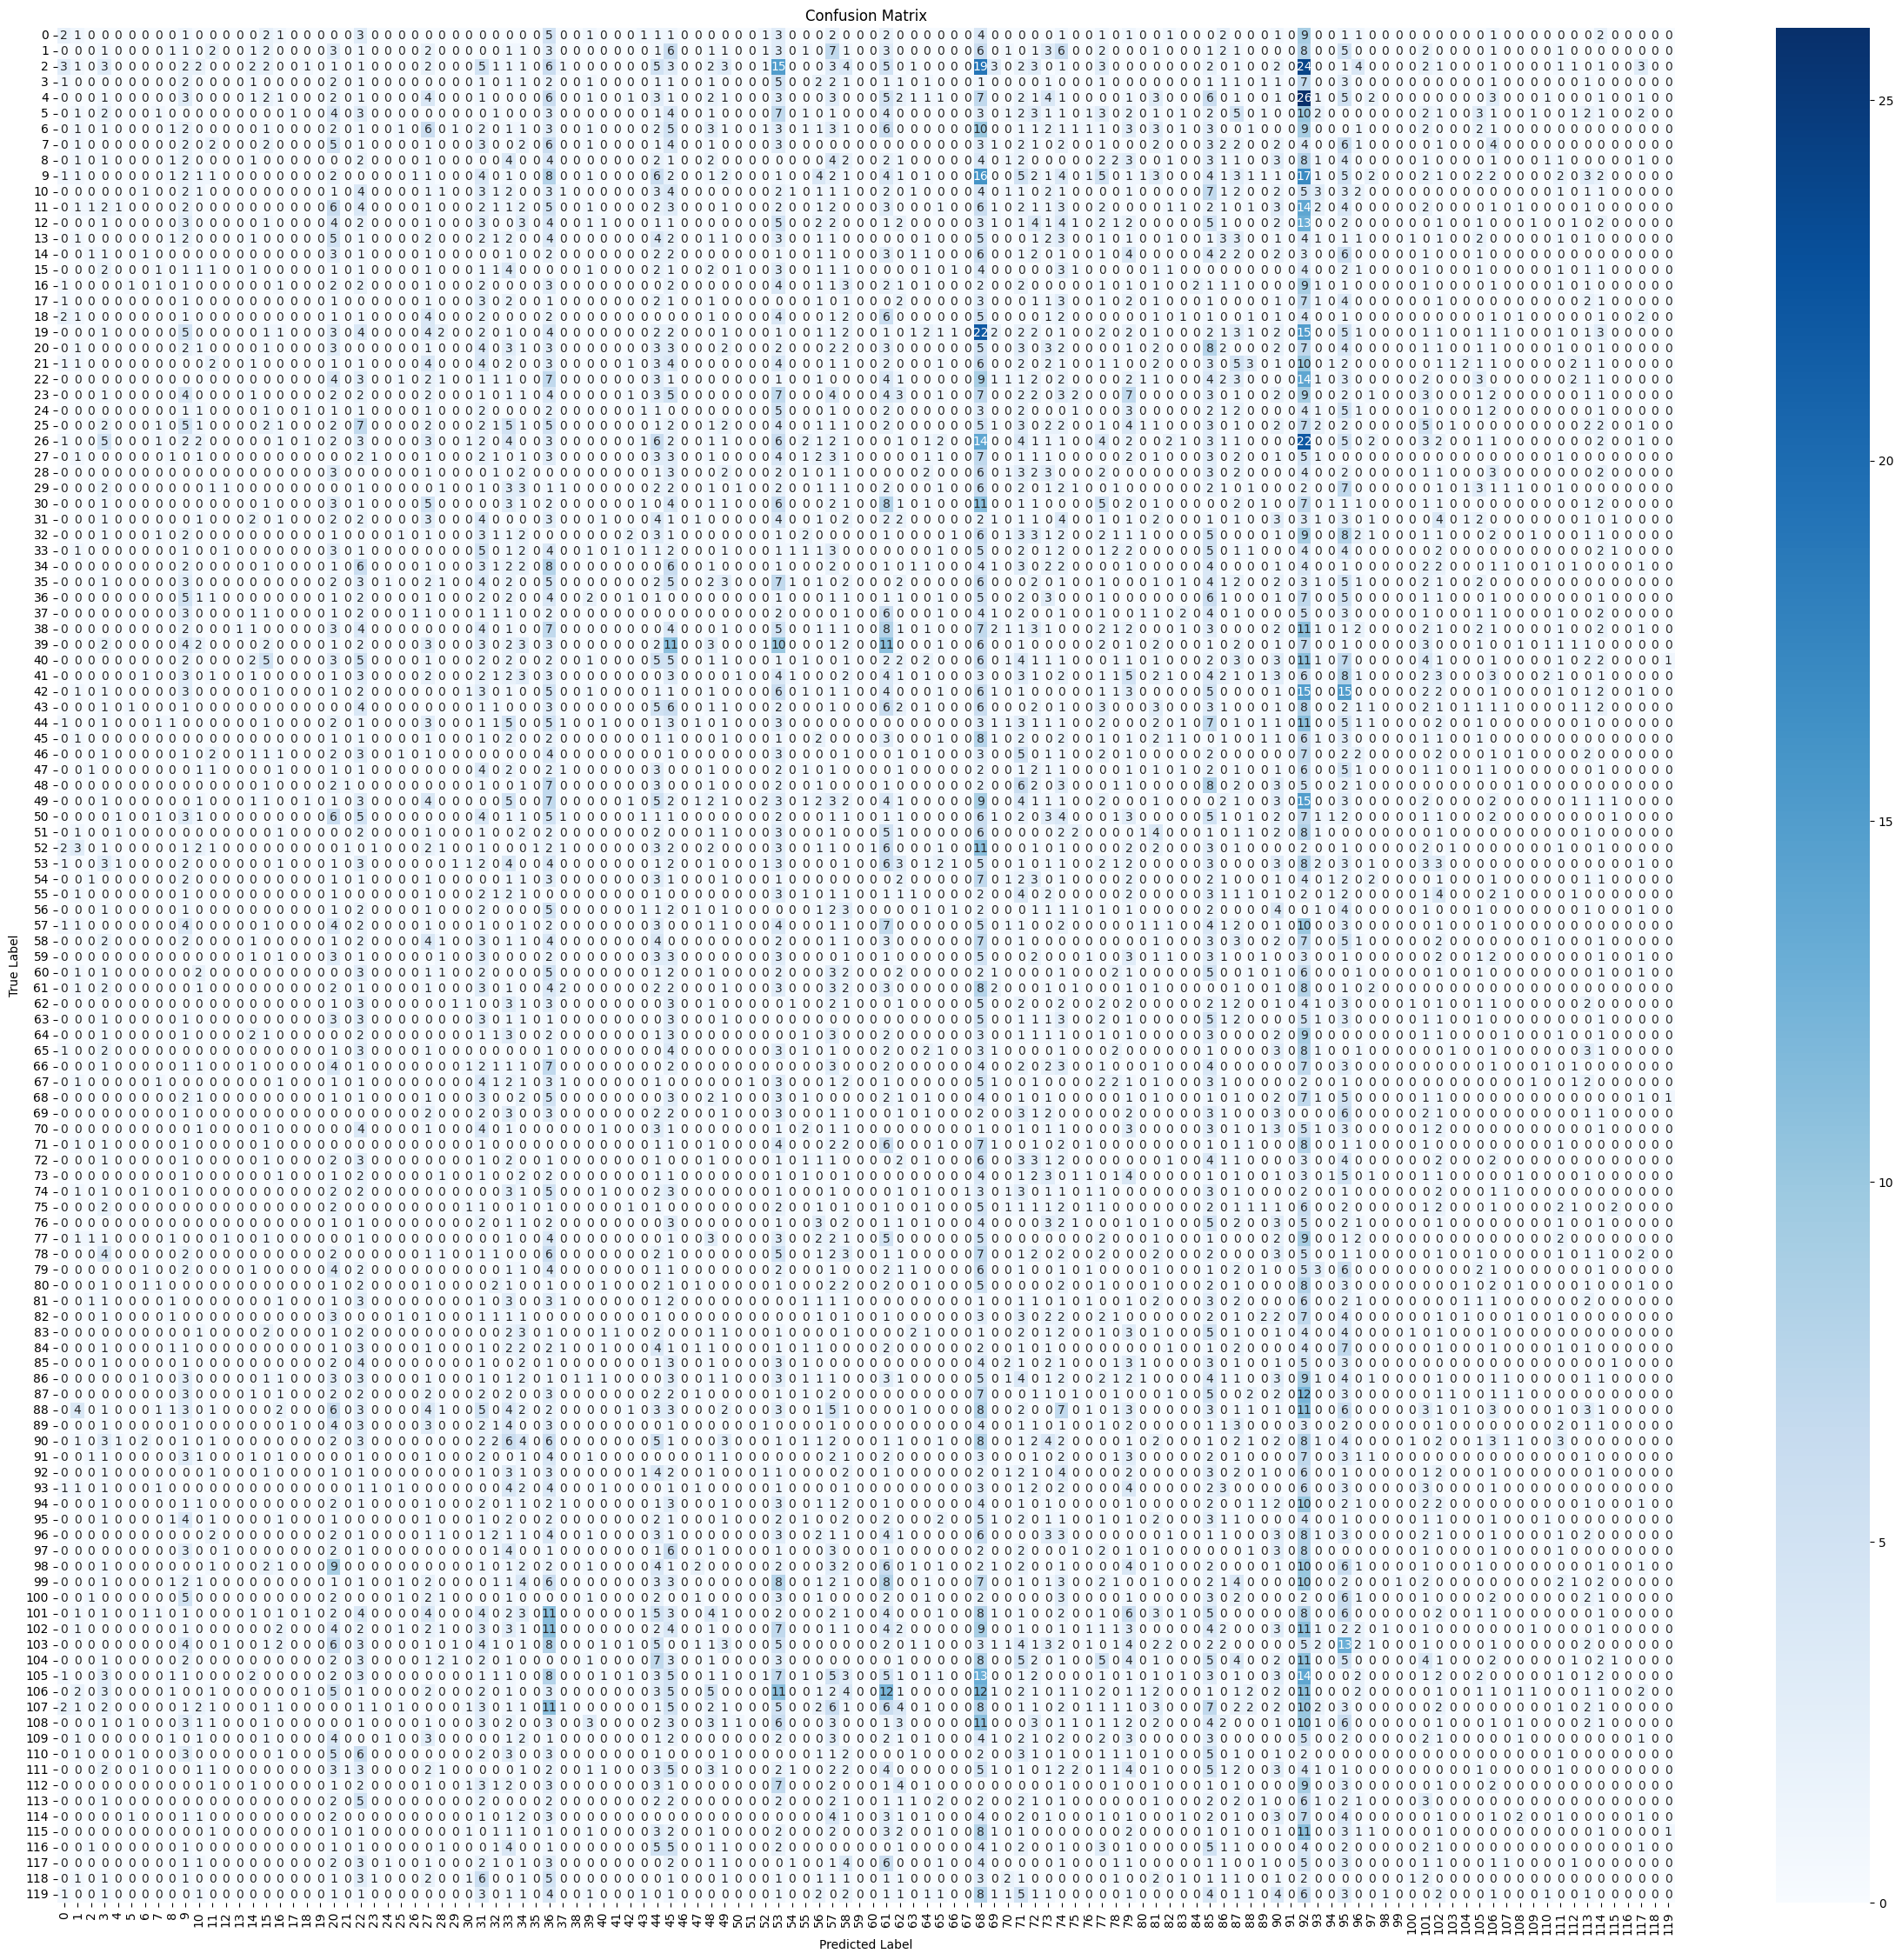

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your model is already trained and named model_bn
# ...

# Predict on the test set
y_pred = model_bn.predict(X_test)

# Convert the one-hot encoded predictions and true labels back to class labels
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Classification Accuracy:", accuracy)

# Create confusion matrix
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(30, 28))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(120), yticklabels=range(120))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
